In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.drop("Patient Id", axis=1, inplace=True)
df.drop("index", axis=1, inplace=True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [6]:
print('Cancer Levels: ', df['Level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


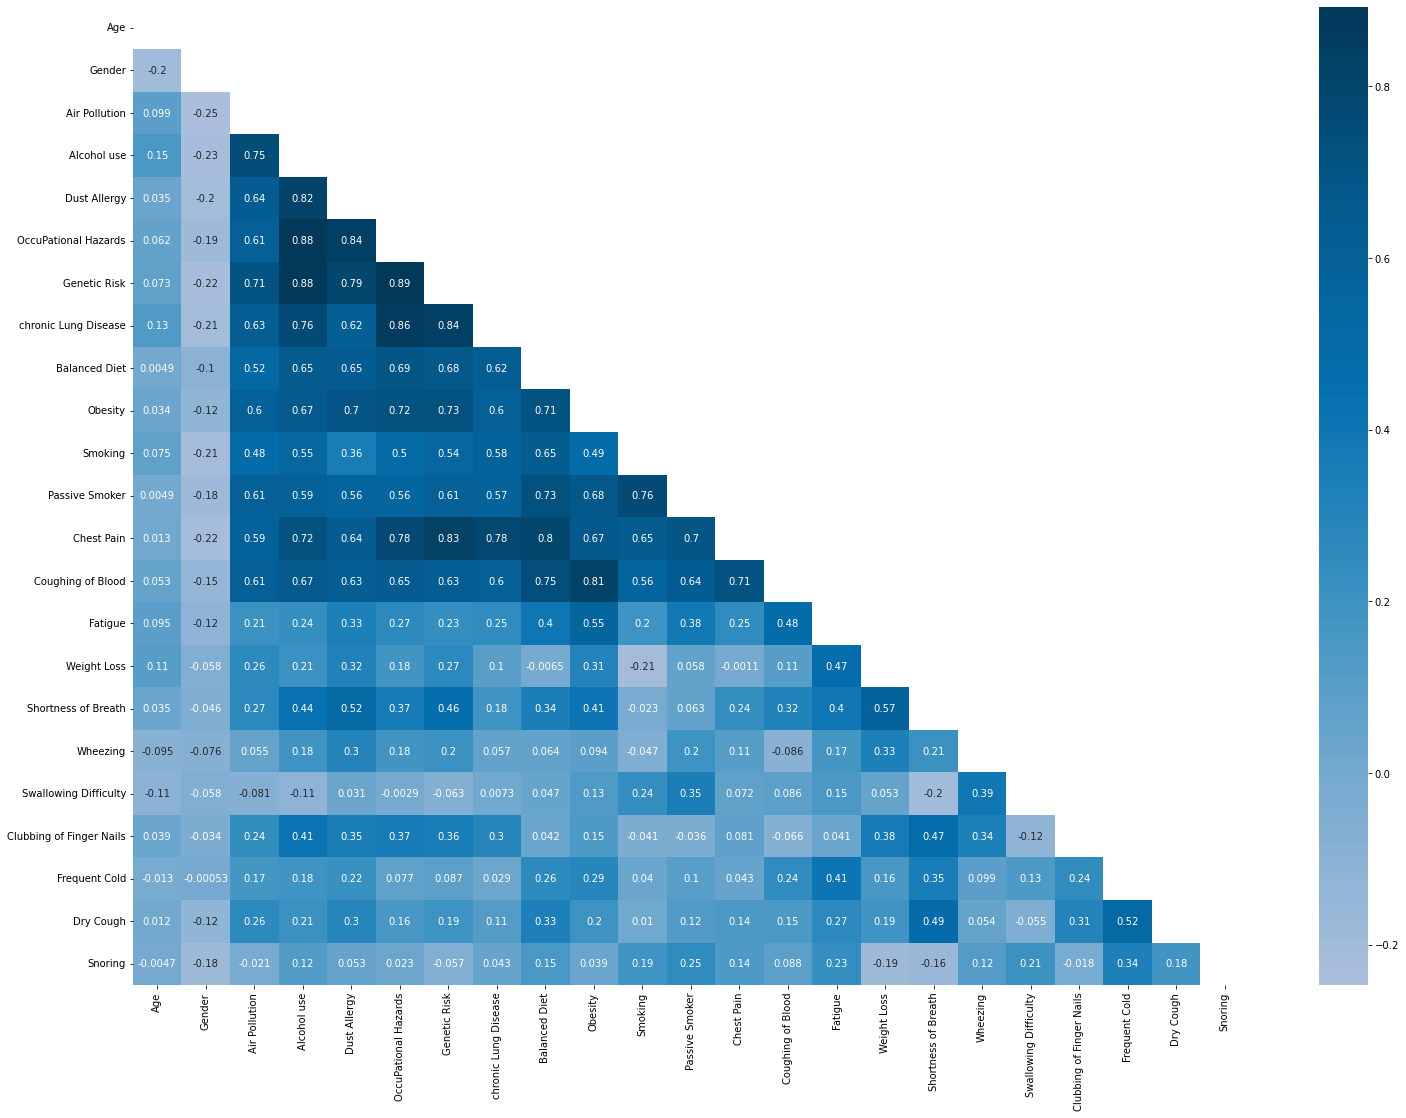

In [8]:

plt.figure(figsize=(25,18))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu,center=0,mask=mask)
plt.show()

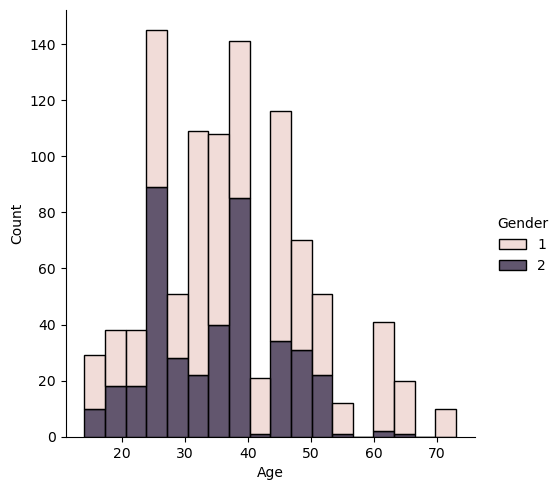

In [9]:
ax= sns.displot(df, x="Age",hue="Gender", multiple="stack")
ax.fig.set_dpi(100)

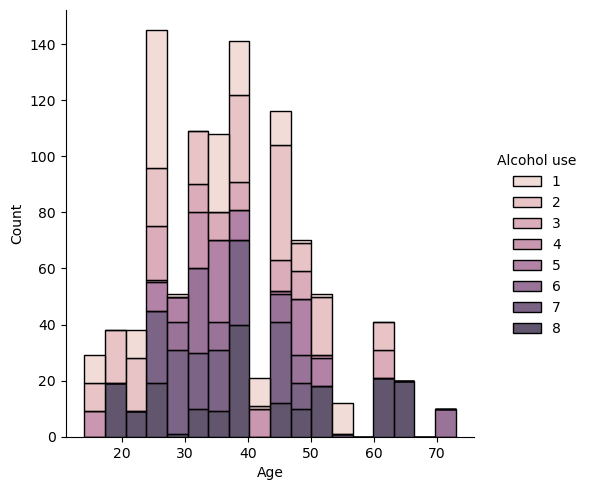

In [10]:
ax= sns.displot(df, x="Age",hue="Alcohol use", multiple="stack")
ax.fig.set_dpi(100)

<AxesSubplot:xlabel='Gender', ylabel='count'>

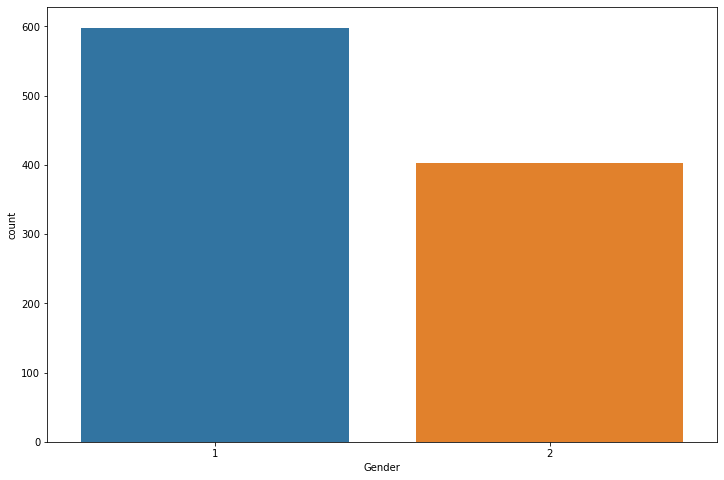

In [11]:
plt.figure(figsize = (12,8))
sns.countplot(x=df["Gender"])

<AxesSubplot:xlabel='Air Pollution', ylabel='count'>

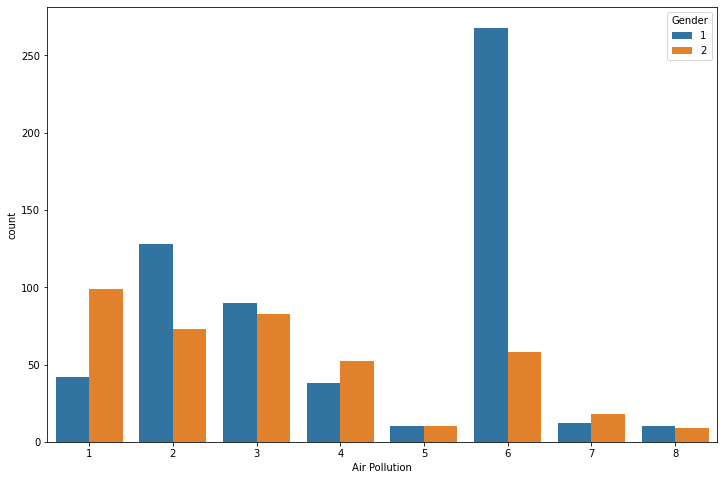

In [12]:
plt.figure(figsize = (12,8))

sns.countplot(data=df, x="Air Pollution", hue="Gender")

<AxesSubplot:xlabel='Alcohol use', ylabel='count'>

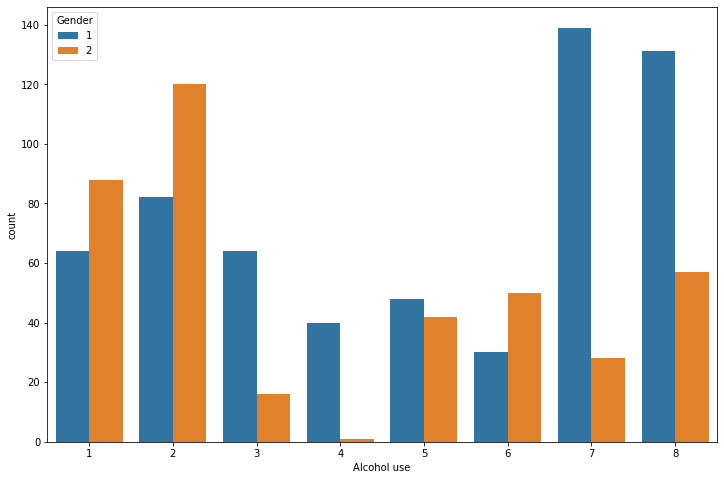

In [13]:
plt.figure(figsize = (12,8))

sns.countplot(data=df, x="Alcohol use", hue="Gender")

<AxesSubplot:xlabel='Dust Allergy', ylabel='count'>

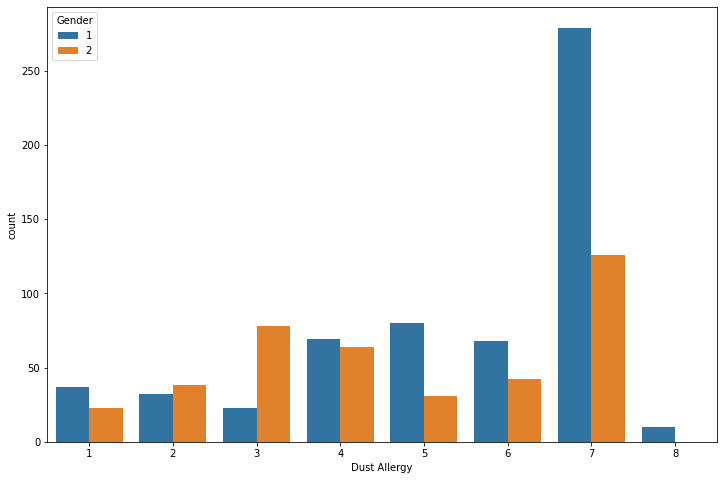

In [14]:
plt.figure(figsize = (12,8))

sns.countplot(data=df, x="Dust Allergy", hue="Gender")

<AxesSubplot:xlabel='Genetic Risk', ylabel='count'>

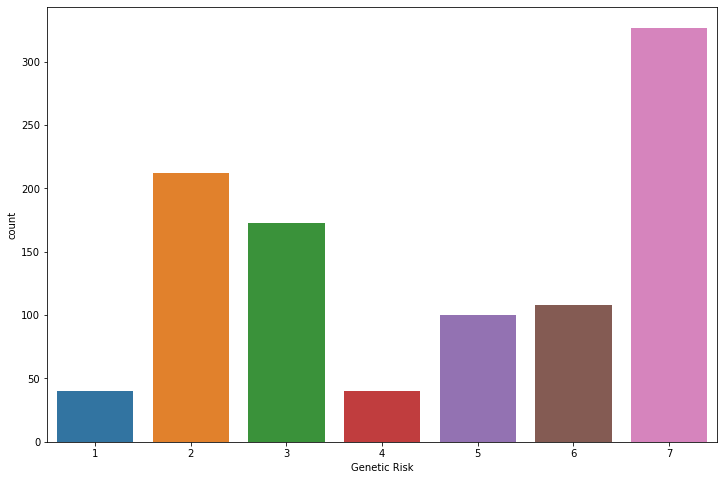

In [15]:
plt.figure(figsize = (12,8))

sns.countplot(data=df, x="Genetic Risk")

<AxesSubplot:xlabel='Obesity', ylabel='count'>

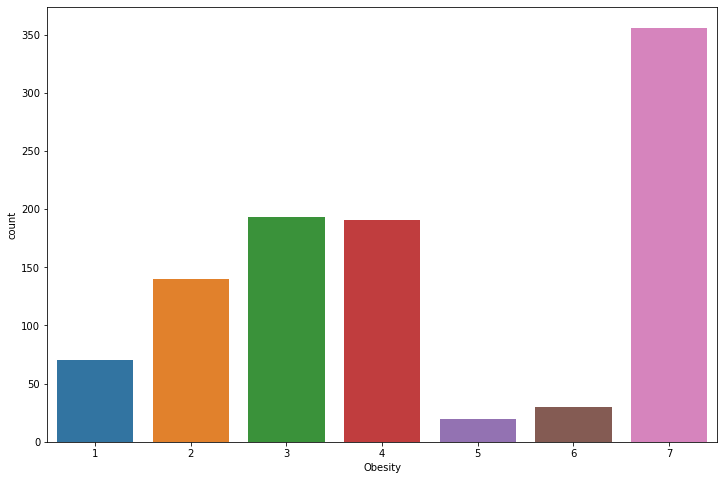

In [16]:
plt.figure(figsize = (12,8))

sns.countplot(data=df, x="Obesity")

<AxesSubplot:xlabel='Smoking', ylabel='count'>

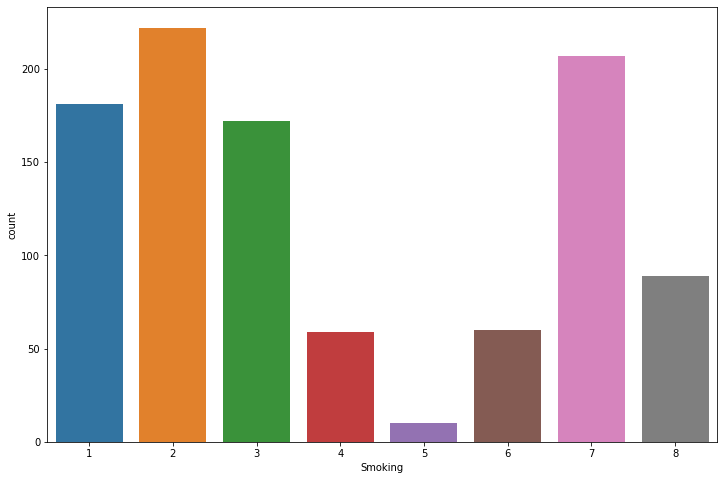

In [17]:
plt.figure(figsize = (12,8))

sns.countplot(data=df, x="Smoking")

<AxesSubplot:xlabel='Passive Smoker', ylabel='count'>

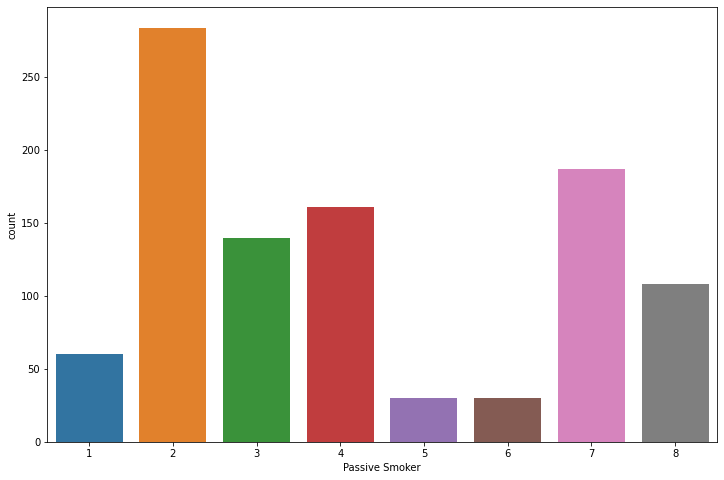

In [18]:
plt.figure(figsize = (12,8))

sns.countplot(data=df, x="Passive Smoker")

<AxesSubplot:xlabel='Smoking', ylabel='count'>

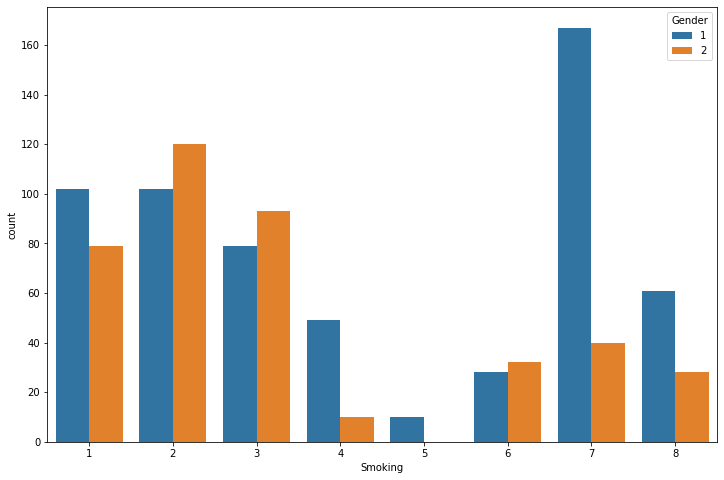

In [19]:
plt.figure(figsize = (12,8))

sns.countplot(data=df, x="Smoking",hue="Gender")

<AxesSubplot:xlabel='Fatigue', ylabel='count'>

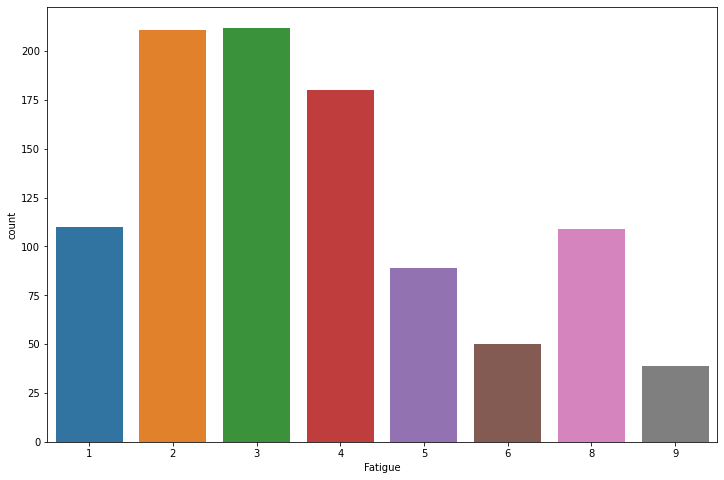

In [20]:
plt.figure(figsize = (12,8))

sns.countplot(data=df, x="Fatigue")

<AxesSubplot:xlabel='Level', ylabel='count'>

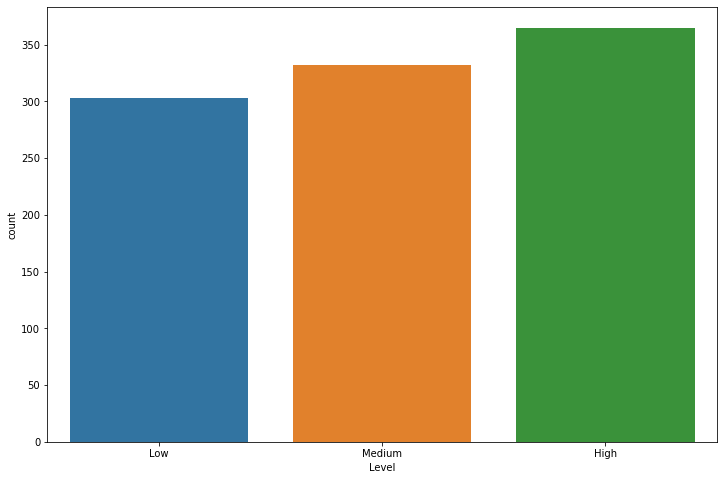

In [21]:
plt.figure(figsize = (12,8))

sns.countplot(data=df, x="Level")

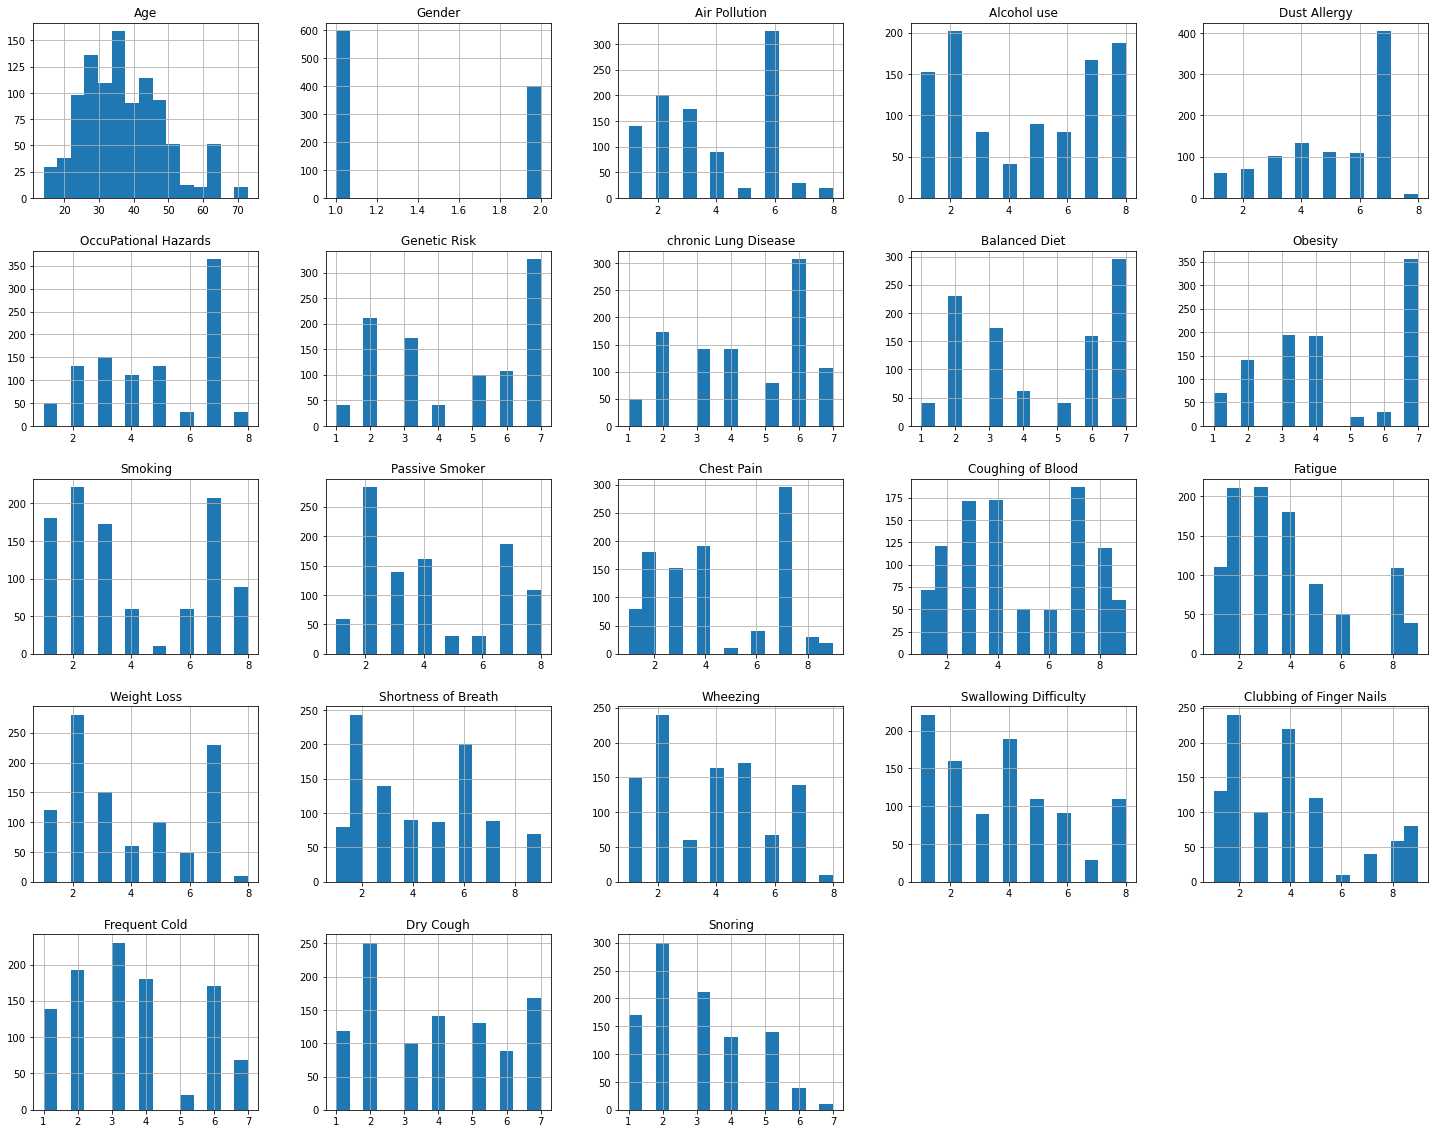

In [22]:
df.hist(figsize=(25,20),bins = 15)
plt.title("Features Distribution")
plt.show()

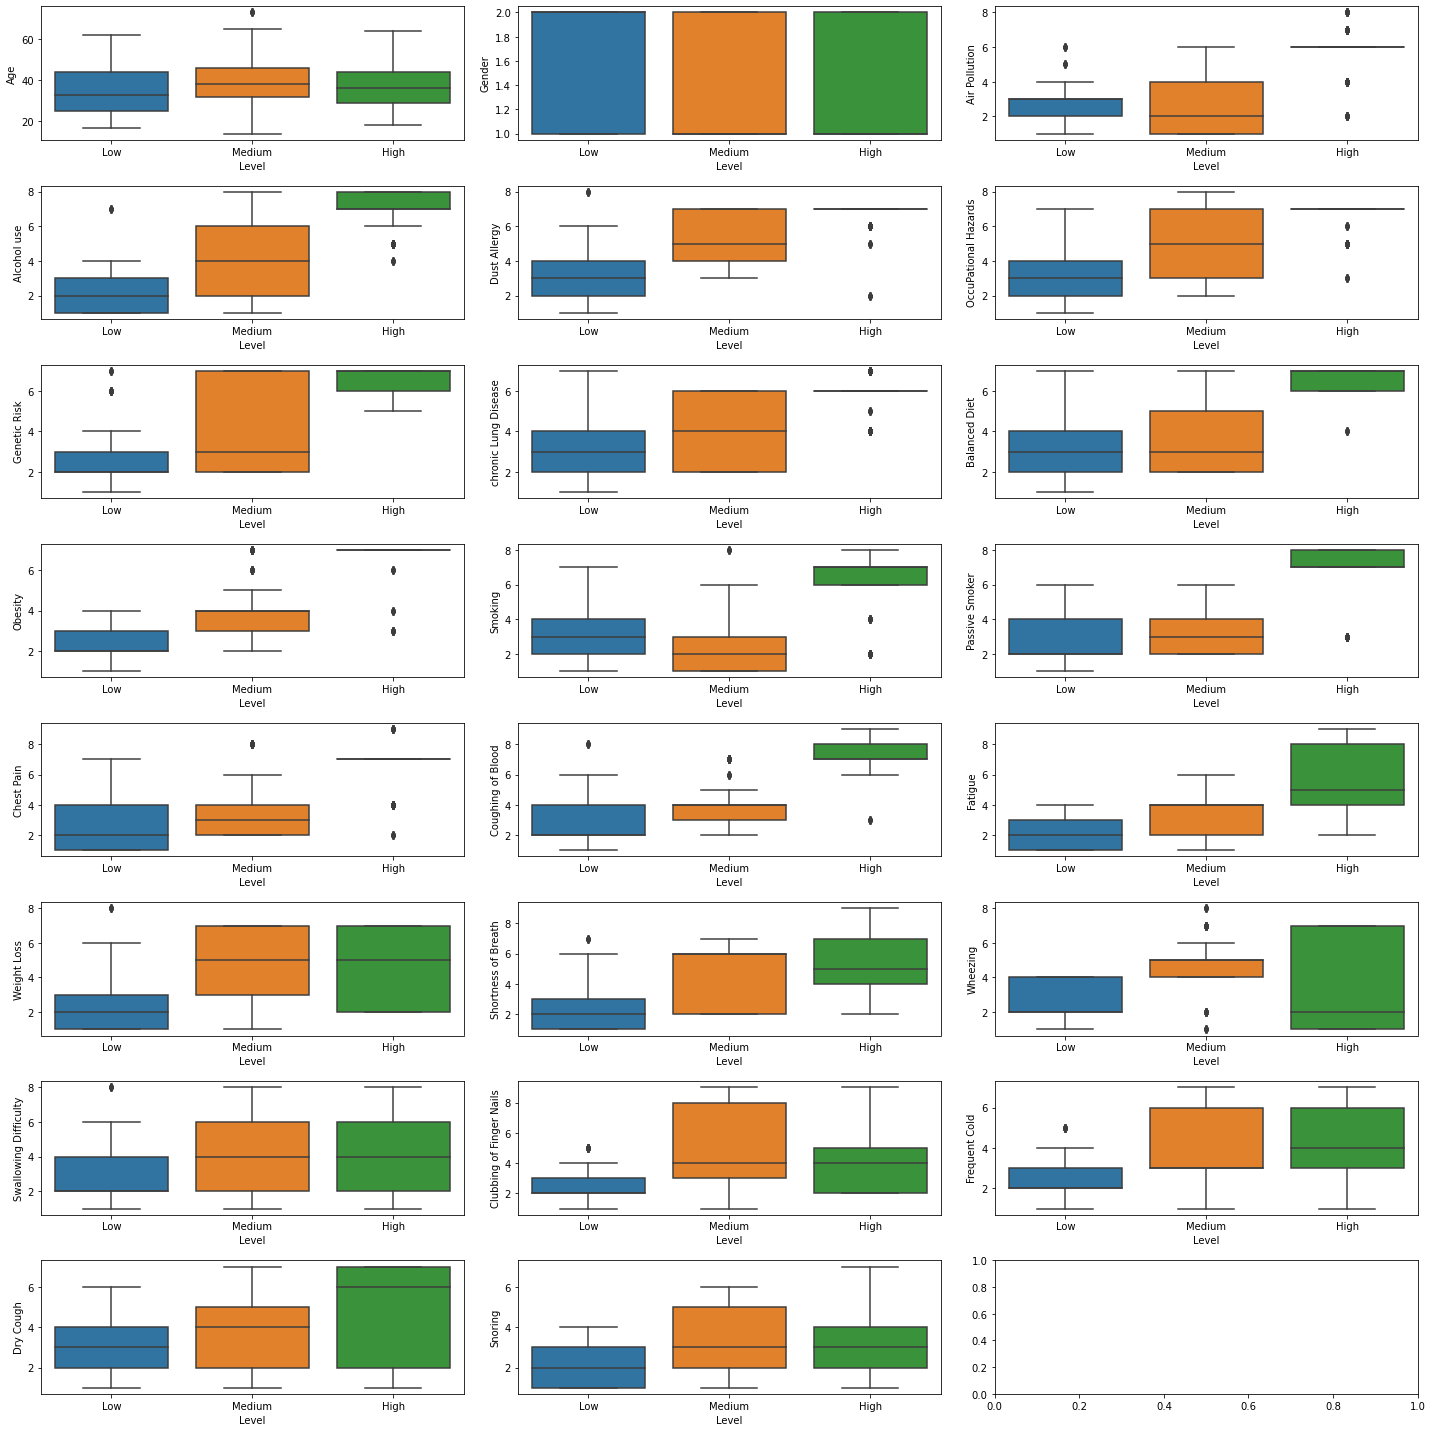

In [23]:
fig,ax = plt.subplots(nrows = 8, ncols=3, figsize=(20,20))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Level'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [26]:
le = preprocessing.LabelEncoder()
X = df.drop(['Level'],axis=1)
y = le.fit_transform(df['Level'])
y = y.reshape(-1, 1)

In [27]:
y = np_utils.to_categorical(y)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [29]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()

X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)

In [30]:
import keras

In [31]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(3, activation='softmax'),
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

2023-01-31 16:15:03.154112: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [32]:
hist = model.fit(X_train, y_train, epochs=25, validation_split=0.3)

2023-01-31 16:15:09.273376: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
15/15 [==============================] - 1s 21ms/step - loss: 1.0531 - accuracy: 0.4915 - val_loss: 0.7699 - val_accuracy: 0.8465
Epoch 2/25
15/15 [==============================] - 0s 6ms/step - loss: 0.7357 - accuracy: 0.7415 - val_loss: 0.5524 - val_accuracy: 0.9059
Epoch 3/25
15/15 [==============================] - 0s 6ms/step - loss: 0.5345 - accuracy: 0.8397 - val_loss: 0.4072 - val_accuracy: 0.9059
Epoch 4/25
15/15 [==============================] - 0s 6ms/step - loss: 0.4183 - accuracy: 0.8868 - val_loss: 0.3043 - val_accuracy: 0.9406
Epoch 5/25
15/15 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.9145 - val_loss: 0.2302 - val_accuracy: 0.9455
Epoch 6/25
15/15 [==============================] - 0s 5ms/step - loss: 0.2388 - accuracy: 0.9444 - val_loss: 0.1797 - val_accuracy: 0.9604
Epoch 7/25
15/15 [==============================] - 0s 6ms/step - loss: 0.1949 - accuracy: 0.9466 - val_loss: 0.1446 - val_accuracy: 0.9703
Epoch 8/25
15/15 [=

In [33]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9970


[0.023296507075428963, 0.9969696998596191]

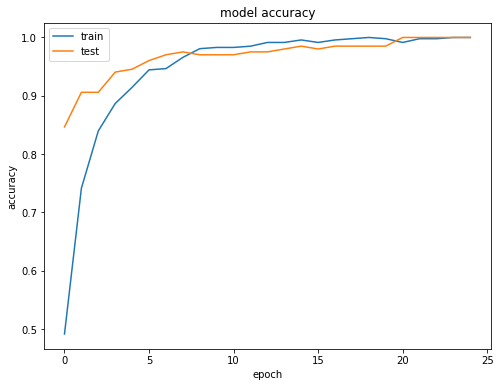

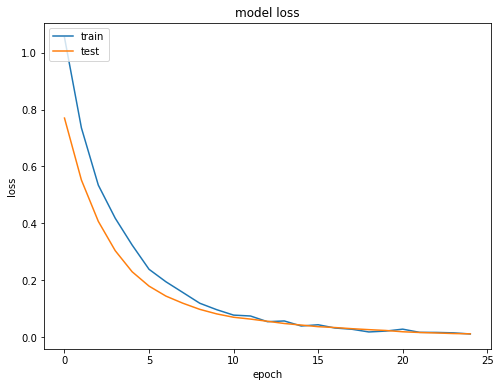

In [34]:
plt.figure(figsize=(8, 6))

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(8, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     


In [35]:
predict = model.predict(X_test)
classes = np.argmax(predict, axis=1)
y_true = np.argmax(y_test, axis=1)

In [36]:
score, acc = model.evaluate(X_test, y_test,batch_size=10)

33/33 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9970


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

In [39]:
model = RandomForestClassifier(max_depth=20)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy_score(y_test, y_pred)

1.0